In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
features = list()
with open('../features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [5]:
X_test = pd.read_csv('../test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('../test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv('../test/y_test.txt', names=['Activity'], squeeze=True)

In [6]:
X = X_train.values

## DBScan

In [7]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=10)

In [8]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 303, 3906,  880,    8,  159, 1094, 1002]))

In [9]:
X_train.loc[np.where(dbscan.labels_==-1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
27,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,...,0.156185,-0.241781,0.013526,0.043354,0.021485,0.046689,-0.667085,0.054216,-0.218875,1
30,0.221847,0.034108,-0.123612,-0.814708,-0.749418,-0.571899,-0.878682,-0.776895,-0.700710,-0.737152,...,0.743098,0.596733,0.179223,0.077595,0.056348,-0.316727,-0.582806,-0.020756,-0.255270,1
31,-0.041701,0.175102,0.025552,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,...,0.482485,0.256095,0.114760,0.114436,-0.070782,-0.001461,-0.552939,-0.053539,-0.260424,1
32,0.013904,0.153296,0.016243,-0.808638,-0.572746,-0.626415,-0.806213,-0.533811,-0.579394,-0.916064,...,0.143358,-0.097418,-0.004913,0.033988,-0.036068,0.205113,-0.418368,-0.142549,-0.305884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,-0.088994,0.270256,0.167615,-0.840510,-0.470905,-0.668258,-0.834703,-0.443943,-0.636058,-0.948723,...,-0.391806,-0.797221,0.118589,0.094648,-0.021962,0.026312,-0.661154,0.057936,-0.223915,30
7001,-0.003060,0.210302,0.036347,-0.797451,-0.362963,-0.553527,-0.783895,-0.272666,-0.479636,-0.887848,...,-0.130502,-0.572981,0.015838,0.063686,0.031717,0.007030,-0.480101,-0.066440,-0.310414,30
7189,0.281279,0.027026,-0.078728,-0.915616,-0.834043,-0.686235,-0.953192,-0.824257,-0.773325,-0.703837,...,-0.209003,-0.613155,0.061415,0.016246,-0.346680,-0.382527,-0.869831,0.187881,0.010203,30
7190,0.270349,0.054640,-0.006442,-0.919021,-0.797208,-0.606512,-0.949277,-0.812261,-0.604579,-0.703837,...,-0.242856,-0.673792,0.063645,-0.084797,0.081627,0.623570,-0.894985,0.168664,-0.000578,30


# LOF

In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
#lof = LocalOutlierFactor()
#from sklearn.model_selection import GridSearchCV
#k_range = list(range(5, 1500, 20))
#param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
#grid = GridSearchCV(lof, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
#grid_search=grid.fit(X_train, y_train)

In [12]:
#print(grid_search.best_params_)

In [13]:
SKL_lof = LocalOutlierFactor(n_neighbors=5)
outliers = SKL_lof.fit_predict(X)

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

In [14]:
SKL_lof.negative_outlier_factor_

array([-1.35316757, -1.06739907, -1.02107865, ..., -1.04899774,
       -1.01585394, -0.98727148])

In [15]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  10, 7342]))

In [16]:
SKL_lof_pos = np.where(outliers==-1)

In [17]:
len(SKL_lof.negative_outlier_factor_[np.where(outliers==-1)])

10

In [18]:
max_val = np.max(SKL_lof.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.520424724991964

In [19]:
np.min(SKL_lof.negative_outlier_factor_[np.where(outliers==-1)])

-1.8463076110398606

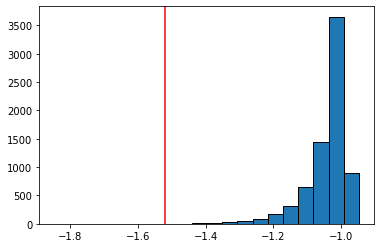

In [20]:
plt.hist(SKL_lof.negative_outlier_factor_, edgecolor='black', bins=20)
plt.axvline(max_val, c='r')
plt.show()

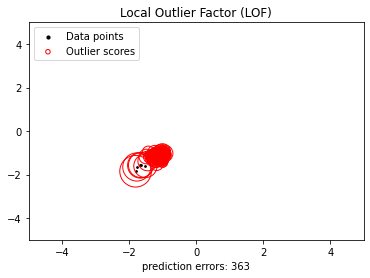

In [21]:
# inliers
X_inliers = SKL_lof.negative_outlier_factor_[np.where(outliers==1)]
X_inliers = X_inliers.reshape(3671, 2)
#X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# outliers
X_outliers = SKL_lof.negative_outlier_factor_[np.where(outliers==-1)]
X_outliers = X_outliers.reshape(5, 2)
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    Xa[:, 0],
    Xa[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [22]:
SKL_lof.negative_outlier_factor_.sort()

In [23]:
for i in range(10):
    print(i, ':', SKL_lof.negative_outlier_factor_[i])

0 : -1.8463076110398606
1 : -1.8146692656016392
2 : -1.77799300991974
3 : -1.6704382707589107
4 : -1.656507010565497
5 : -1.6506433342243731
6 : -1.60122912282725
7 : -1.5725368604907053
8 : -1.567141591257371
9 : -1.520424724991964


In [24]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest

In [25]:
PYOD_lof = LOF()
PYOD_lof.fit(X)

outliers = PYOD_lof.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([6694,  658]))

In [26]:
PYOD_lof_pos = np.where(outliers==1)

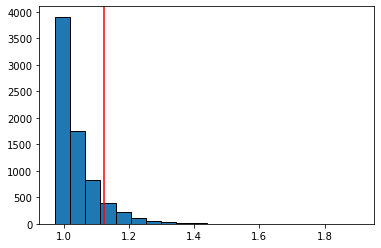

In [27]:
plt.hist(PYOD_lof.decision_scores_, edgecolor='black', bins=20)
plt.axvline(np.min(PYOD_lof.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()

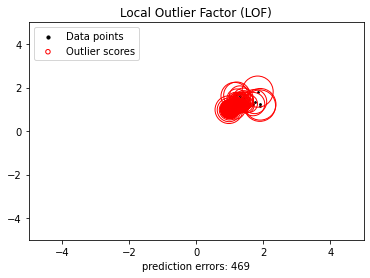

In [28]:
# inliers
X_inliers = PYOD_lof.decision_scores_[np.where(outliers==0)]
X_inliers = X_inliers.reshape(3347, 2)
#X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# outliers
X_outliers = PYOD_lof.decision_scores_[np.where(outliers==1)]
X_outliers = X_outliers.reshape(329, 2)
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    Xa[:, 0],
    Xa[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [29]:
PYOD_lof.decision_scores_.sort()

In [30]:
for i in range(10):
    print(i, ':', PYOD_lof.decision_scores_[-i])

0 : 0.9724617995863485
1 : 1.9058277389288434
2 : 1.8966685963445797
3 : 1.829567876384218
4 : 1.814634026414987
5 : 1.7405274718612698
6 : 1.6937700188520188
7 : 1.6497286803312563
8 : 1.6090882243708002
9 : 1.5979238848739448


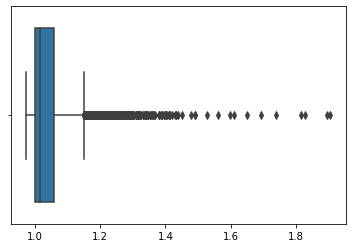

In [31]:
sns.boxplot(x=PYOD_lof.decision_scores_)
plt.show()

# Isolation forest

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
SKL_isof = IsolationForest(random_state=0)
SKL_isof.fit(X)

IsolationForest(random_state=0)

In [34]:
outliers = SKL_isof.predict(X)

In [35]:
SKL_isof_pos = np.where(outliers==-1)

In [36]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 633, 6719]))

In [37]:
PYOD_isof = IForest()
PYOD_isof.fit(X)

outliers = PYOD_isof.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([6616,  736]))

In [38]:
PYOD_isof_pos = np.where(outliers==1)

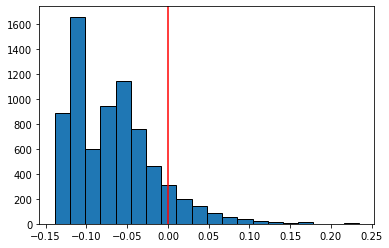

In [39]:
plt.hist(PYOD_isof.decision_scores_, edgecolor='black', bins=20)
plt.axvline(np.min(PYOD_isof.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()

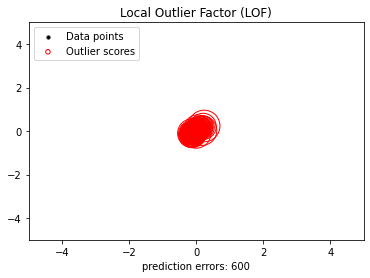

In [40]:
# inliers
X_inliers = PYOD_isof.decision_scores_[np.where(outliers==0)]
X_inliers = X_inliers.reshape(3308, 2)
#X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# outliers
X_outliers = PYOD_isof.decision_scores_[np.where(outliers==1)]
X_outliers = X_outliers.reshape(368, 2)
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    Xa[:, 0],
    Xa[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [41]:
PYOD_isof.decision_scores_.sort()

In [42]:
for i in range(10):
    print(PYOD_isof.decision_scores_[-i])

-0.13899580001161332
0.23450752260365576
0.2327087548479339
0.2159139671744446
0.20246162366316284
0.2007658696511198
0.19700113702115735
0.1900979637939924
0.17662503442518035
0.17603604515975407


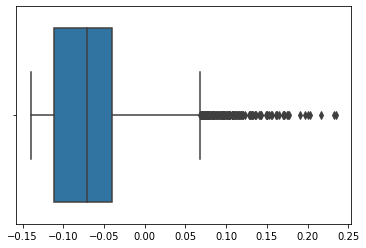

In [43]:
sns.boxplot(x=PYOD_isof.decision_scores_)
plt.show()

## KNN

In [44]:
KNN_clf = KNN()
KNN_clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [45]:
KNN_clf.decision_scores_

array([5.21340427, 3.83522744, 3.44390477, ..., 3.90365944, 3.72084343,
       3.49060192])

In [46]:
anomlay_score = KNN_clf.decision_function(X)

In [47]:
outliers = KNN_clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([6730,  622]))

In [48]:
KNN_clf_pos = np.where(outliers==1)

In [49]:
np.mean(anomlay_score[np.where(outliers==1)])

5.407244240037787

In [50]:
np.mean(anomlay_score[np.where(outliers==0)])

3.5154020580291547

In [51]:
np.mean(KNN_clf.decision_scores_[np.where(outliers==1)])

5.524064762989161

In [52]:
np.mean(KNN_clf.decision_scores_[np.where(outliers==0)])

3.5961647499816864

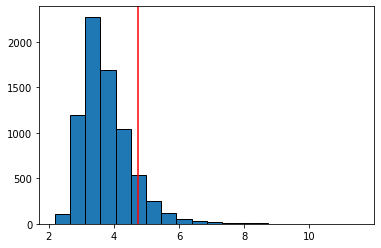

In [53]:
plt.hist(KNN_clf.decision_scores_, edgecolor='black', bins=20)
plt.axvline(np.min(KNN_clf.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()

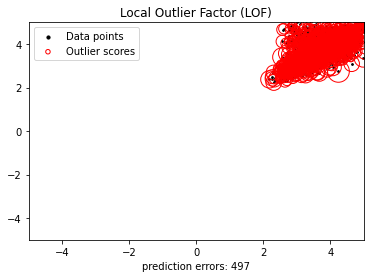

In [54]:
# inliers
X_inliers = KNN_clf.decision_scores_[np.where(outliers==0)]
X_inliers = X_inliers.reshape(3365, 2)
#X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# outliers
X_outliers = KNN_clf.decision_scores_[np.where(outliers==1)]
X_outliers = X_outliers.reshape(311, 2)
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    Xa[:, 0],
    Xa[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

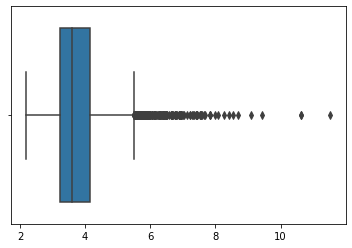

In [55]:
sns.boxplot(x=KNN_clf.decision_scores_)
plt.show()

In [56]:
anomlay_score.sort()

In [57]:
for i in range(10):
    print(i, ':', anomlay_score[-i])

0 : 2.119069873501069
1 : 10.442238918838926
2 : 9.937942170087211
3 : 9.255347530810088
4 : 8.73219800312308
5 : 8.651659118795559
6 : 8.286437944669451
7 : 8.270416475720046
8 : 8.078529745251025
9 : 8.063761642997138


# Outlier probability

# Outliers common to all algorithms

In [58]:
interlof = np.intersect1d(PYOD_isof_pos, SKL_isof_pos)
interisof = np.intersect1d(PYOD_lof_pos, KNN_clf_pos)

In [59]:
interlofisof = np.intersect1d(interlof, interisof)

In [60]:
len(interlofisof)

94